In [8]:
!hostname
!python -V
!pwd

6b414fd67b37
Python 3.12.12
/content/gated-norm-experiment


In [9]:
!nvidia-smi

Sat Feb 14 04:53:32 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
import os
import shutil

# Clean up existing directory to ensure fresh clone
if os.path.exists("gated-norm-experiment"):
    shutil.rmtree("gated-norm-experiment")
    print("Removed existing directory.")

!git clone https://github.com/kubotadaichi/gated-norm-experiment.git
%cd gated-norm-experiment

Removed existing directory.
Cloning into 'gated-norm-experiment'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 43 (delta 12), reused 40 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 2.39 MiB | 33.05 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/gated-norm-experiment/gated-norm-experiment


In [11]:
! curl -LsSf https://astral.sh/uv/install.sh | sh

downloading uv 0.10.2 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!


In [12]:
!uv sync

Using CPython 3.12.12 interpreter at: /usr/bin/python3
Creating virtual environment at: .venv
Resolved 83 packages in 273ms                                        
Prepared 1 package in 30ms                                               
Installed 80 packages in 610ms                              
 + aiohappyeyeballs==2.6.1
 + aiohttp==3.13.3
 + aiosignal==1.4.0
 + annotated-doc==0.0.4
 + anyio==4.12.1
 + attrs==25.4.0
 + certifi==2026.1.4
 + charset-normalizer==3.4.4
 + click==8.3.1
 + contourpy==1.3.3
 + cuda-bindings==12.9.4
 + cuda-pathfinder==1.3.4
 + cycler==0.12.1
 + datasets==4.5.0
 + dill==0.4.0
 + filelock==3.21.2
 + fonttools==4.61.1
 + frozenlist==1.8.0
 + fsspec==2025.10.0
 + h11==0.16.0
 + hf-xet==1.2.0
 + httpcore==1.0.9
 + httpx==0.28.1
 + huggingface-hub==1.4.1
 + idna==3.11
 + jinja2==3.1.6
 + kiwisolver==1.4.9
 + markdown-it-py==4.0.0
 + markupsafe==3.0.3
 + matplotlib==3.10.8
 + mdurl==0.1.2
 + mpmath==1.3.0
 + multidict==6.7.1
 + multiprocess==0.70.18
 + networkx==

In [14]:
!uv add matplotlib-inline
!uv add ipython

Resolved 98 packages in 0.92ms
Audited 95 packages in 1ms
Resolved 98 packages in 0.96ms
Audited 95 packages in 1ms


In [15]:
!curl -LsSf https://hf.co/cli/install.sh | bash

[INFO] Installing Hugging Face CLI...
[INFO] OS: linux
[INFO] Force reinstall: false
[INFO] Install dir: /root/.hf-cli
[INFO] Bin dir: /root/.local/bin
[INFO] Skip PATH update: false
[INFO] Using Python: Python 3.12.12
[INFO] Creating directories...
[INFO] Creating virtual environment...
[INFO] Virtual environment already exists; reusing (pass --force to recreate)
[INFO] Installing/upgrading Hugging Face CLI (latest)...
[INFO] Installation output suppressed; set HF_CLI_VERBOSE_PIP=1 for full logs
[INFO] Using uv for faster installation
[INFO] Linking hf CLI into /root/.local/bin...
[INFO] hf available at /root/.local/bin/hf (symlink to venv)
[INFO] Run without touching PATH: env PATH="/root/.local/bin:$PATH" hf --help
[INFO] /root/.local/bin is not in your PATH
[INFO] Verifying installation...
[SUCCESS] Hugging Face CLI installed successfully!
[INFO] CLI location: /root/.local/bin/hf
[INFO] Installation directory: /root/.hf-cli
[INFO] Current version: 1.4.1
[INFO] 
[INFO] To uninstall 

In [16]:
import getpass
import os

hf_token = getpass.getpass("Enter your Hugging Face Token: ")
os.environ["HF_TOKEN"] = hf_token

# Create .env file for experiment.py to read
with open(".env", "w") as f:
    f.write(f"HF_TOKEN={hf_token}\n")
    
print("HF_TOKEN set and .env created.")

HF_TOKEN set and .env created.


In [17]:
!uv run experiment.py --config_name all --epochs 5 --batch_size 32 --push_to_hub --hf_repo_id "daichi202/gated-norm-test"

Configuration: {'d_model': 256, 'n_head': 4, 'n_layers': 4, 'vocab_size': 50257, 'max_len': 128, 'batch_size': 32, 'lr': 0.0005, 'epochs': 5, 'device': 'cuda', 'log_interval': 10, 'eval_interval': 100, 'push_to_hub': True, 'hf_repo_id': 'daichi202/gated-norm-test'}
Starting training for Baseline: norm_type=rmsnorm, gated=False
Loading WikiText-2...
Baseline Epoch 1:   9% 99/1148 [00:14<02:27,  7.12it/s, loss=2.27]Step 100: Val Loss = 2.7545
Baseline Epoch 1:  17% 199/1148 [00:34<02:18,  6.85it/s, loss=2.64]Step 200: Val Loss = 2.6437
Baseline Epoch 1:  26% 299/1148 [00:55<02:05,  6.78it/s, loss=3.03]Step 300: Val Loss = 2.5570
Baseline Epoch 1:  35% 399/1148 [01:16<01:55,  6.48it/s, loss=2.79]Step 400: Val Loss = 2.1655
Baseline Epoch 1:  43% 499/1148 [01:38<01:44,  6.23it/s, loss=1.82]Step 500: Val Loss = 1.7158
Baseline Epoch 1:  52% 599/1148 [02:02<01:32,  5.94it/s, loss=1.28]Step 600: Val Loss = 1.3186
Baseline Epoch 1:  61% 699/1148 [02:25<01:13,  6.08it/s, loss=1.56] Step 700: Va

In [18]:
!uv run evaluate.py --repo_id "daichi202/gated-norm-test"

Using device: cuda
Loading WikiText-2...
Map: 100% 4358/4358 [00:00<00:00, 4863.07 examples/s]
Map: 100% 36718/36718 [00:09<00:00, 4003.34 examples/s]
Map: 100% 3760/3760 [00:00<00:00, 4731.64 examples/s]
model_baseline.pt: 100% 116M/116M [00:03<00:00, 37.9MB/s] 
Loading Baseline...
Evaluating Baseline...
Baseline Val Loss: 0.0472
Saved RMSNorm weight plot to results/weights_baseline_rms.png
model_gatednorm.pt: 100% 116M/116M [00:02<00:00, 56.1MB/s] 
Loading GatedNorm...
Evaluating GatedNorm...
GatedNorm Val Loss: 0.0496
Saved RMSNorm weight plot to results/weights_gatednorm_rms.png
model_preaffine.pt: 100% 116M/116M [00:02<00:00, 57.6MB/s] 
Loading PreAffine...
Evaluating PreAffine...
PreAffine Val Loss: 0.0465
Saved RMSNorm weight plot to results/weights_preaffine_rms.png
Saved PreAffine lambda plot to results/weights_preaffine_lambda.png

=== Final Evaluation Results ===
Baseline: 0.0472
GatedNorm: 0.0496
PreAffine: 0.0465


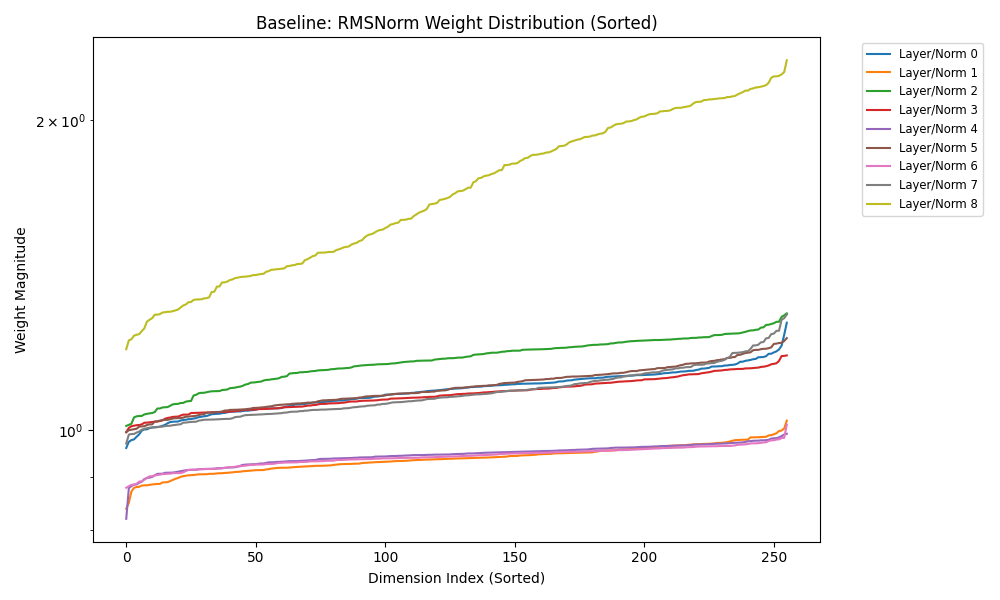

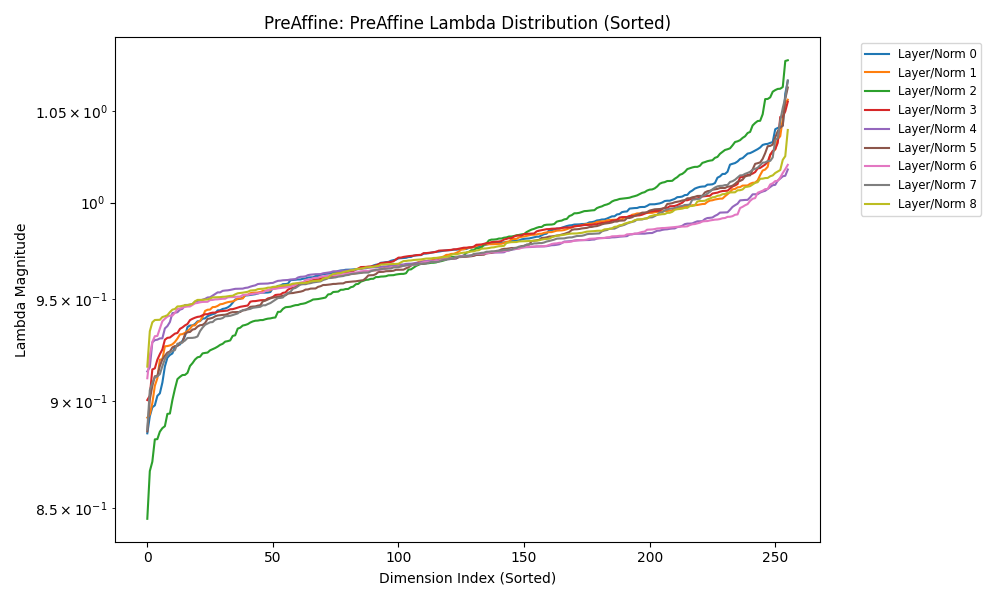

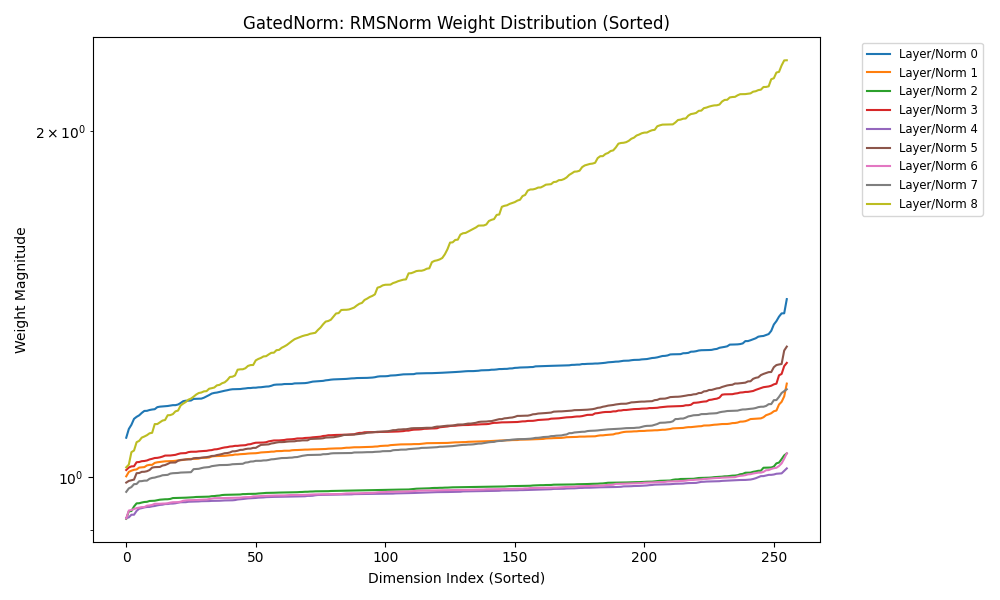

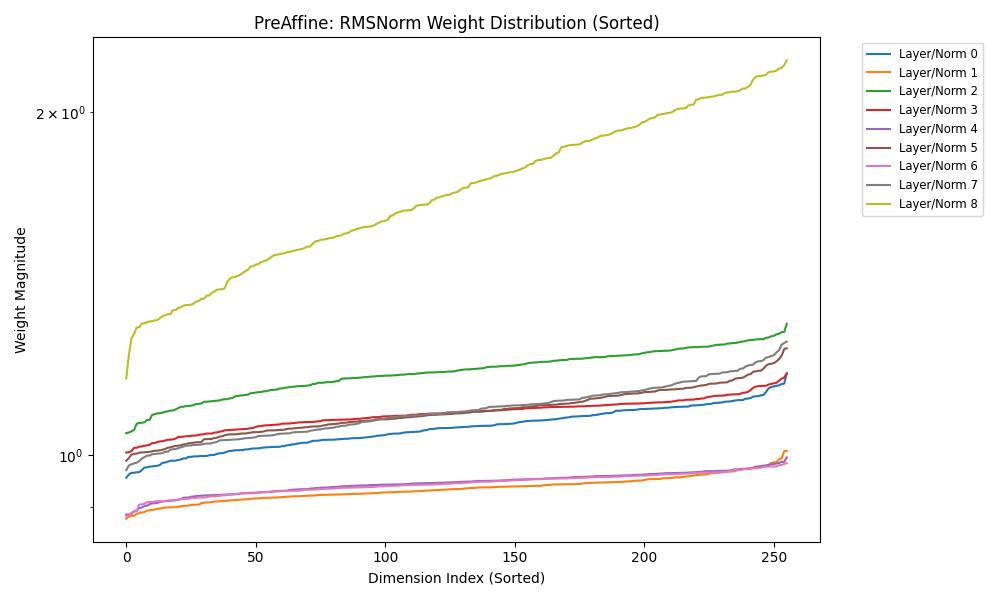

In [23]:
from IPython.display import Image, display


display(Image(filename='results/weights_baseline_rms.png'))
display(Image(filename='results/weights_preaffine_lambda.png'))
display(Image(filename='results/weights_gatednorm_rms.png'))
display(Image(filename='results/weights_preaffine_rms.png'))



In [24]:
!ls results

baseline.csv	    model_preaffine.pt	       weights_preaffine_lambda.png
gatednorm.csv	    preaffine.csv	       weights_preaffine_rms.png
model_baseline.pt   weights_baseline_rms.png
model_gatednorm.pt  weights_gatednorm_rms.png


In [27]:
!uv run plot_results.py

Plot saved to experiment_results.png


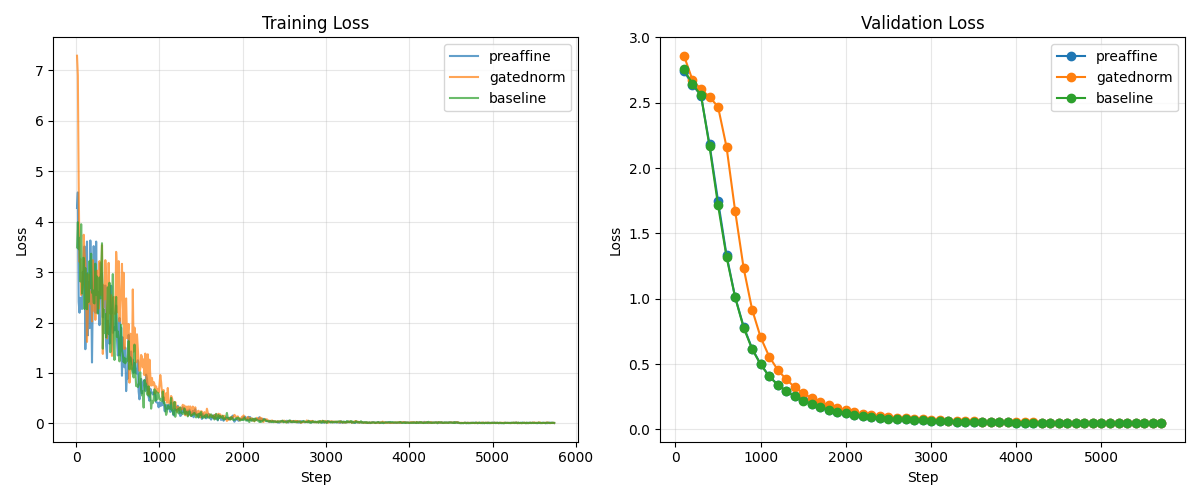

In [28]:
display(Image(filename='experiment_results.png'))